In this task, Forecasting bus demand in Banana Republic municipalities is aimed. The data that is presented from PIWorks has the number of used buses for an hour in each municipality. To forecast bus demand, in this notebook,the amount of usage is used with LSTM (Long-Short Term Model).
Firstly, the timestamp column is set to obtain two different column as date and time column. After that, according to given necessity, the dataset is split with the last two weeks being the test dataset. Then, the dataset is split for each municipality and LSTM was applied for each municipality dataset. According to results, the model gives graphs that can be observed demand behaviors. Also, by analyzing metric results, when there is low demand, the model gives better performances. In municipality 1, the demand is higher than the total capacity of municipality 1. Also, in municipality 2,5, and 7, the demand is almost near or equal to the total capacities. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive//BananaBus/municipality_bus_utilization.csv')
print(df)

                 timestamp  municipality_id  usage  total_capacity
0      2017-06-04 07:59:42                9    454            1332
1      2017-06-04 07:59:42                8    556            2947
2      2017-06-04 07:59:42                4   1090            3893
3      2017-06-04 07:59:42                0    204            2813
4      2017-06-04 07:59:42                7    718            2019
...                    ...              ...    ...             ...
13065  2017-08-19 16:30:35                2    548             697
13066  2017-08-19 16:30:35                8   1193            2947
13067  2017-08-19 16:30:35                7   1354            2019
13068  2017-08-19 16:30:35                6   1680            3113
13069  2017-08-19 16:30:35                3   1189            1930

[13070 rows x 4 columns]


In [4]:
adf = pd.DataFrame({'datetime':pd.date_range('2020-01-01 07:10',periods=6)})
print("DataFrame is:\n", adf)

DataFrame is:
              datetime
0 2020-01-01 07:10:00
1 2020-01-02 07:10:00
2 2020-01-03 07:10:00
3 2020-01-04 07:10:00
4 2020-01-05 07:10:00
5 2020-01-06 07:10:00


In [5]:
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time

In [6]:
print(df)

                 timestamp  municipality_id  usage  total_capacity  \
0      2017-06-04 07:59:42                9    454            1332   
1      2017-06-04 07:59:42                8    556            2947   
2      2017-06-04 07:59:42                4   1090            3893   
3      2017-06-04 07:59:42                0    204            2813   
4      2017-06-04 07:59:42                7    718            2019   
...                    ...              ...    ...             ...   
13065  2017-08-19 16:30:35                2    548             697   
13066  2017-08-19 16:30:35                8   1193            2947   
13067  2017-08-19 16:30:35                7   1354            2019   
13068  2017-08-19 16:30:35                6   1680            3113   
13069  2017-08-19 16:30:35                3   1189            1930   

             date      time  
0      2017-06-04  07:59:42  
1      2017-06-04  07:59:42  
2      2017-06-04  07:59:42  
3      2017-06-04  07:59:42  
4      20

In [7]:
ddf = df.drop(labels='timestamp', axis=1)

In [8]:
import matplotlib.pyplot as plt
train = ddf[ddf.date < pd.to_datetime("2017-08-15", format='%Y-%m-%d')]
test = ddf[ddf.date >= pd.to_datetime("2017-08-15", format='%Y-%m-%d')]

/usr/local/lib/python3.7/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [9]:
print(train)

       municipality_id  usage  total_capacity        date      time
0                    9    454            1332  2017-06-04  07:59:42
1                    8    556            2947  2017-06-04  07:59:42
2                    4   1090            3893  2017-06-04  07:59:42
3                    0    204            2813  2017-06-04  07:59:42
4                    7    718            2019  2017-06-04  07:59:42
...                ...    ...             ...         ...       ...
12165                5    143             587  2017-08-14  16:30:00
12166                1    381             397  2017-08-14  16:30:00
12167                9    728            1332  2017-08-14  16:30:00
12168                4   2601            3893  2017-08-14  16:30:00
12169                2    588             697  2017-08-14  16:30:00

[12170 rows x 5 columns]


In [10]:
print(test)

       municipality_id  usage  total_capacity        date      time
12170                5     23             587  2017-08-15  07:57:02
12171                3    597            1930  2017-08-15  07:57:02
12172                7    730            2019  2017-08-15  07:57:02
12173                8    539            2947  2017-08-15  07:57:02
12174                1    160             397  2017-08-15  07:57:02
...                ...    ...             ...         ...       ...
13065                2    548             697  2017-08-19  16:30:35
13066                8   1193            2947  2017-08-19  16:30:35
13067                7   1354            2019  2017-08-19  16:30:35
13068                6   1680            3113  2017-08-19  16:30:35
13069                3   1189            1930  2017-08-19  16:30:35

[900 rows x 5 columns]


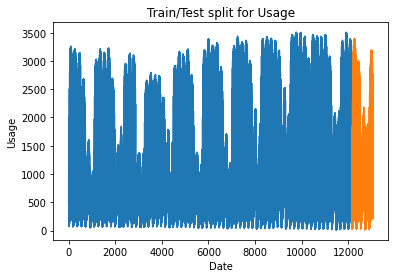

In [11]:
plt.plot(train.usage)
plt.plot(test.usage)
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Train/Test split for Usage")
plt.show()

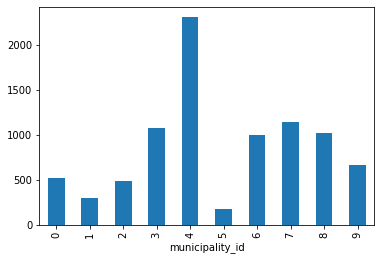

In [11]:
train.groupby('municipality_id')['usage'].mean().plot.bar()

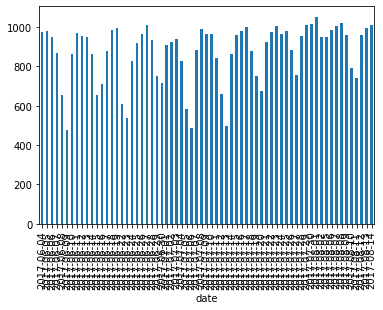

In [105]:
train.groupby('date')['usage'].mean().plot.bar()

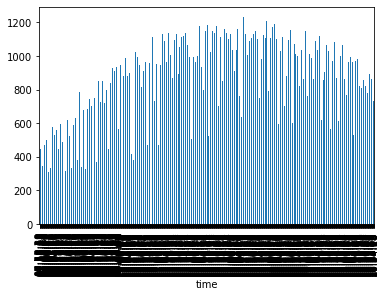

In [106]:
train.groupby('time')['usage'].mean().plot.bar()

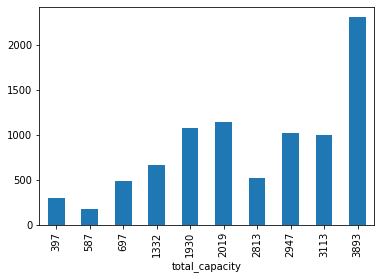

In [107]:
train.groupby('total_capacity')['usage'].mean().plot.bar()

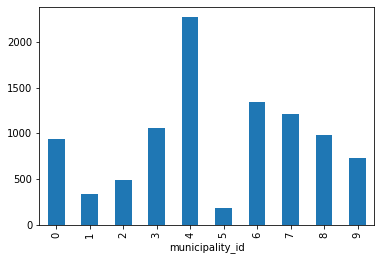

In [108]:
test.groupby('municipality_id')['usage'].mean().plot.bar()

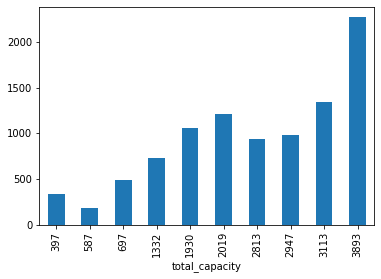

In [109]:
test.groupby('total_capacity')['usage'].mean().plot.bar()

In [12]:
train0=train.loc[train['municipality_id'] == 0]
test0=test.loc[test['municipality_id'] == 0]
print(train0)

       municipality_id  usage  total_capacity        date      time
3                    0    204            2813  2017-06-04  07:59:42
18                   0    247            2813  2017-06-04  08:25:42
29                   0    332            2813  2017-06-04  08:59:42
34                   0    429            2813  2017-06-04  09:32:46
47                   0    485            2813  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12129                0    627            2813  2017-08-14  14:30:01
12131                0    614            2813  2017-08-14  14:56:03
12143                0    593            2813  2017-08-14  15:30:00
12151                0    563            2813  2017-08-14  15:56:02
12162                0    519            2813  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [13]:
train1=train.loc[train['municipality_id'] == 1]
test1=test.loc[test['municipality_id'] == 1]
print(train1)

       municipality_id  usage  total_capacity        date      time
7                    1    129             397  2017-06-04  07:59:42
19                   1    138             397  2017-06-04  08:25:42
24                   1    164             397  2017-06-04  08:59:42
36                   1    213             397  2017-06-04  09:32:46
46                   1    245             397  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12121                1    403             397  2017-08-14  14:30:01
12138                1    403             397  2017-08-14  14:56:03
12149                1    400             397  2017-08-14  15:30:00
12155                1    394             397  2017-08-14  15:56:02
12166                1    381             397  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [14]:
train2=train.loc[train['municipality_id'] == 2]
test2=test.loc[test['municipality_id'] == 2]
print(train2)

       municipality_id  usage  total_capacity        date      time
6                    2    273             697  2017-06-04  07:59:42
10                   2    311             697  2017-06-04  08:25:42
23                   2    355             697  2017-06-04  08:59:42
37                   2    423             697  2017-06-04  09:32:46
41                   2    494             697  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12128                2    687             697  2017-08-14  14:30:01
12137                2    661             697  2017-08-14  14:56:03
12141                2    639             697  2017-08-14  15:30:00
12154                2    621             697  2017-08-14  15:56:02
12169                2    588             697  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [15]:
train3=train.loc[train['municipality_id'] == 3]
test3=test.loc[test['municipality_id'] == 3]
print(train3)

       municipality_id  usage  total_capacity        date      time
9                    3    623            1930  2017-06-04  07:59:42
17                   3    770            1930  2017-06-04  08:25:42
22                   3    967            1930  2017-06-04  08:59:42
39                   3   1130            1930  2017-06-04  09:32:46
45                   3   1263            1930  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12125                3   1482            1930  2017-08-14  14:30:01
12136                3   1449            1930  2017-08-14  14:56:03
12144                3   1380            1930  2017-08-14  15:30:00
12156                3   1326            1930  2017-08-14  15:56:02
12160                3   1172            1930  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [78]:
train4=train.loc[train['municipality_id'] == 4]
test4=test.loc[test['municipality_id'] == 4]
print(train4)

       municipality_id  usage  total_capacity        date      time
2                    4   1090            3893  2017-06-04  07:59:42
14                   4   1476            3893  2017-06-04  08:25:42
26                   4   2016            3893  2017-06-04  08:59:42
33                   4   2511            3893  2017-06-04  09:32:46
43                   4   2811            3893  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12123                4   3285            3893  2017-08-14  14:30:01
12132                4   3184            3893  2017-08-14  14:56:03
12148                4   3043            3893  2017-08-14  15:30:00
12157                4   2890            3893  2017-08-14  15:56:02
12168                4   2601            3893  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [17]:
train5=train.loc[train['municipality_id'] == 5]
test5=test.loc[test['municipality_id'] == 5]
print(train5)

       municipality_id  usage  total_capacity        date      time
5                    5     70             587  2017-06-04  07:59:42
16                   5     73             587  2017-06-04  08:25:42
20                   5     89             587  2017-06-04  08:59:42
35                   5    116             587  2017-06-04  09:32:46
40                   5    159             587  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12122                5    182             587  2017-08-14  14:30:01
12133                5    170             587  2017-08-14  14:56:03
12140                5    151             587  2017-08-14  15:30:00
12150                5    154             587  2017-08-14  15:56:02
12165                5    143             587  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [18]:
train6=train.loc[train['municipality_id'] == 6]
test6=test.loc[test['municipality_id'] == 6]
print(train6)

       municipality_id  usage  total_capacity        date      time
8                    6    597            3113  2017-06-04  07:59:42
12                   6    687            3113  2017-06-04  08:25:42
28                   6    801            3113  2017-06-04  08:59:42
32                   6    941            3113  2017-06-04  09:32:46
49                   6   1061            3113  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12127                6   1216            3113  2017-08-14  14:30:01
12130                6   1175            3113  2017-08-14  14:56:03
12145                6   1117            3113  2017-08-14  15:30:00
12158                6   1069            3113  2017-08-14  15:56:02
12164                6    990            3113  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [19]:
train7=train.loc[train['municipality_id'] == 7]
test7=test.loc[test['municipality_id'] == 7]
print(train7)

       municipality_id  usage  total_capacity        date      time
4                    7    718            2019  2017-06-04  07:59:42
13                   7    789            2019  2017-06-04  08:25:42
27                   7    873            2019  2017-06-04  08:59:42
38                   7   1013            2019  2017-06-04  09:32:46
44                   7   1151            2019  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12126                7   1515            2019  2017-08-14  14:30:01
12134                7   1477            2019  2017-08-14  14:56:03
12142                7   1420            2019  2017-08-14  15:30:00
12153                7   1383            2019  2017-08-14  15:56:02
12163                7   1307            2019  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [21]:
train8=train.loc[train['municipality_id'] == 8]
test8=test.loc[test['municipality_id'] == 8]
print(train8)

       municipality_id  usage  total_capacity        date      time
1                    8    556            2947  2017-06-04  07:59:42
15                   8    674            2947  2017-06-04  08:25:42
25                   8    857            2947  2017-06-04  08:59:42
30                   8   1045            2947  2017-06-04  09:32:46
42                   8   1172            2947  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12120                8   1324            2947  2017-08-14  14:30:01
12135                8   1306            2947  2017-08-14  14:56:03
12146                8   1269            2947  2017-08-14  15:30:00
12159                8   1238            2947  2017-08-14  15:56:02
12161                8   1151            2947  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [22]:
train9=train.loc[train['municipality_id'] == 9]
test9=test.loc[test['municipality_id'] == 9]
print(train9)

       municipality_id  usage  total_capacity        date      time
0                    9    454            1332  2017-06-04  07:59:42
11                   9    487            1332  2017-06-04  08:25:42
21                   9    527            1332  2017-06-04  08:59:42
31                   9    599            1332  2017-06-04  09:32:46
48                   9    666            1332  2017-06-04  09:59:48
...                ...    ...             ...         ...       ...
12124                9    837            1332  2017-08-14  14:30:01
12139                9    825            1332  2017-08-14  14:56:03
12147                9    790            1332  2017-08-14  15:30:00
12152                9    771            1332  2017-08-14  15:56:02
12167                9    728            1332  2017-08-14  16:30:00

[1217 rows x 5 columns]


In [63]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train0['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train0 = []
y_train0 = []

for x in range(prediction_days, len(scaled_data)):
    x_train0.append(scaled_data[x-prediction_days:x, 0])
    y_train0.append(scaled_data[x, 0])


x_train0, y_train0 = np.array(x_train0), np.array(y_train0)
x_train0 = np.reshape(x_train0, (x_train0.shape[0], x_train0.shape[1], 1))

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train0.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train0, y_train0, epochs = 25, batch_size=32, validation_split=0.1)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_42 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_43 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_43 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_44 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_44 (Dropout)        (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 1)               

In [64]:
model_inputs = test0['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test0 = np.array(model_inputs)
x_test0 = np.reshape(x_test0, (x_test0.shape[0], x_test0.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train0['usage'].values),max(train0['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

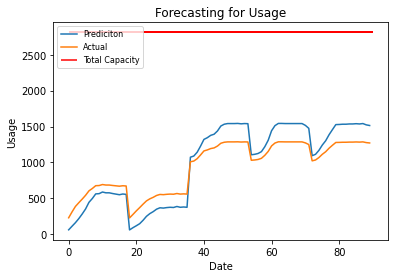

In [65]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test0.usage,label='Actual')
plt.hlines(test0.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', mean_absolute_error(test0.usage, scaled_pred))
print('MSE:', mean_squared_error(test0.usage, scaled_pred))

MAE: 188.0294921875
MSE: 38997.18516412311


In [67]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train1['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train1 = []
y_train1 = []

for x in range(prediction_days, len(scaled_data)):
    x_train1.append(scaled_data[x-prediction_days:x, 0])
    y_train1.append(scaled_data[x, 0])


x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train1.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train1, y_train1, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test1['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test1 = np.array(model_inputs)
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train1['usage'].values),max(train1['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_45 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_46 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_46 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_47 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_47 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)               

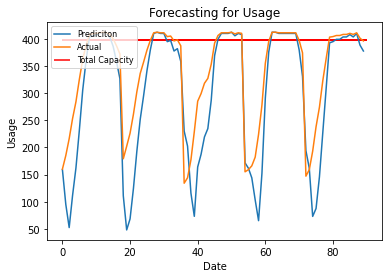

MAE: 42.820659722222224
MSE: 4427.689815266927


In [68]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test1.usage,label='Actual')
plt.hlines(test1.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE:', mean_absolute_error(test1.usage, scaled_pred))
print('MSE:', mean_squared_error(test1.usage, scaled_pred))

In [69]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train2['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train2 = []
y_train2 = []

for x in range(prediction_days, len(scaled_data)):
    x_train2.append(scaled_data[x-prediction_days:x, 0])
    y_train2.append(scaled_data[x, 0])


x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train2.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train2, y_train2, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test2['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test2 = np.array(model_inputs)
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train2['usage'].values),max(train2['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_48 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_48 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_49 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_49 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_50 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 1)               

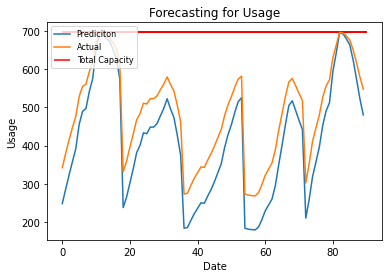

MAE: 69.15288899739583
MSE: 5552.1725845687915


In [70]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test2.usage,label='Actual')
plt.hlines(test2.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test2.usage, scaled_pred))
print('MSE:', mean_squared_error(test2.usage, scaled_pred))

In [71]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train3['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train3 = []
y_train3 = []

for x in range(prediction_days, len(scaled_data)):
    x_train3.append(scaled_data[x-prediction_days:x, 0])
    y_train3.append(scaled_data[x, 0])


x_train3, y_train3 = np.array(x_train3), np.array(y_train3)
x_train3 = np.reshape(x_train3, (x_train3.shape[0], x_train3.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train3.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train3, y_train3, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test3['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test3 = np.array(model_inputs)
x_test3 = np.reshape(x_test3, (x_test3.shape[0], x_test3.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train3['usage'].values),max(train3['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_51 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_52 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_52 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_53 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_53 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 1)               

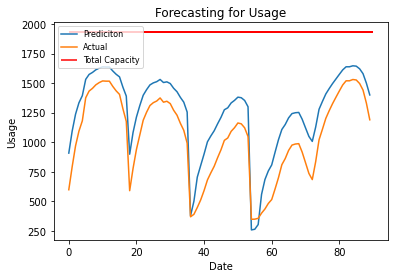

MAE: 210.71343858506944
MSE: 49759.87717253102


In [72]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test3.usage,label='Actual')
plt.hlines(test3.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test3.usage, scaled_pred))
print('MSE:', mean_squared_error(test3.usage, scaled_pred))

In [79]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train4['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train4 = []
y_train4 = []

for x in range(prediction_days, len(scaled_data)):
    x_train4.append(scaled_data[x-prediction_days:x, 0])
    y_train4.append(scaled_data[x, 0])


x_train4, y_train4 = np.array(x_train4), np.array(y_train4)
x_train4 = np.reshape(x_train4, (x_train4.shape[0], x_train4.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train4.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train4, y_train4, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test4['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test4 = np.array(model_inputs)
x_test4 = np.reshape(x_test4, (x_test4.shape[0], x_test4.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train4['usage'].values),max(train4['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_60 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_60 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_61 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_61 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_62 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_62 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 1)               

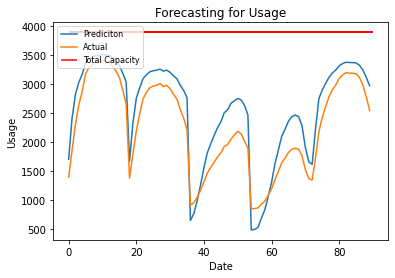

MAE: 341.1771267361111
MSE: 141614.69025421143


In [80]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test4.usage,label='Actual')
plt.hlines(test4.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test4.usage, scaled_pred))
print('MSE:', mean_squared_error(test4.usage, scaled_pred))

In [81]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train5['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train5 = []
y_train5 = []

for x in range(prediction_days, len(scaled_data)):
    x_train5.append(scaled_data[x-prediction_days:x, 0])
    y_train5.append(scaled_data[x, 0])


x_train5, y_train5 = np.array(x_train5), np.array(y_train5)
x_train5 = np.reshape(x_train5, (x_train5.shape[0], x_train5.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train5.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train5, y_train5, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test5['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test5 = np.array(model_inputs)
x_test5 = np.reshape(x_test5, (x_test5.shape[0], x_test5.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train5['usage'].values),max(train5['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_63 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_64 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_64 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_65 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_65 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 1)               

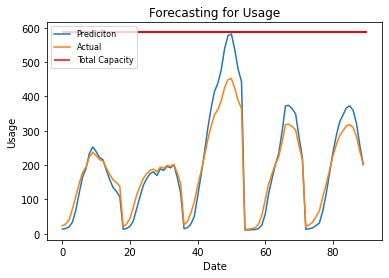

MAE: 29.388221571180555
MSE: 1667.948644827058


In [82]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test5.usage,label='Actual')
plt.hlines(test5.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test5.usage, scaled_pred))
print('MSE:', mean_squared_error(test5.usage, scaled_pred))

In [83]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train6['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train6 = []
y_train6 = []

for x in range(prediction_days, len(scaled_data)):
    x_train6.append(scaled_data[x-prediction_days:x, 0])
    y_train6.append(scaled_data[x, 0])


x_train6, y_train6 = np.array(x_train6), np.array(y_train6)
x_train6 = np.reshape(x_train6, (x_train6.shape[0], x_train6.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train6.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train6, y_train6, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test6['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test6 = np.array(model_inputs)
x_test6 = np.reshape(x_test6, (x_test6.shape[0], x_test6.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train6['usage'].values),max(train6['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_66 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_67 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_67 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_68 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_68 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 1)               

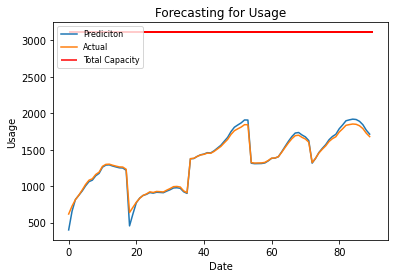

MAE: 25.958376736111113
MSE: 1789.74068997701


In [84]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test6.usage,label='Actual')
plt.hlines(test6.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test6.usage, scaled_pred))
print('MSE:', mean_squared_error(test6.usage, scaled_pred))

In [85]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train7['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train7 = []
y_train7 = []

for x in range(prediction_days, len(scaled_data)):
    x_train7.append(scaled_data[x-prediction_days:x, 0])
    y_train7.append(scaled_data[x, 0])


x_train7, y_train7 = np.array(x_train7), np.array(y_train7)
x_train7 = np.reshape(x_train7, (x_train7.shape[0], x_train7.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train7.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train7, y_train7, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test7['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test7 = np.array(model_inputs)
x_test7 = np.reshape(x_test7, (x_test7.shape[0], x_test7.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train7['usage'].values),max(train7['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_69 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_69 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_70 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_70 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_71 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_71 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 1)               

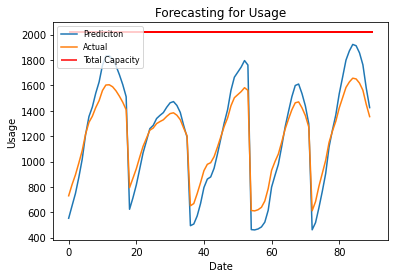

MAE: 119.78802083333333
MSE: 18741.70908610026


In [86]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test7.usage,label='Actual')
plt.hlines(test7.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test7.usage, scaled_pred))
print('MSE:', mean_squared_error(test7.usage, scaled_pred))

In [87]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train8['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train8 = []
y_train8 = []

for x in range(prediction_days, len(scaled_data)):
    x_train8.append(scaled_data[x-prediction_days:x, 0])
    y_train8.append(scaled_data[x, 0])


x_train8, y_train8 = np.array(x_train8), np.array(y_train8)
x_train8 = np.reshape(x_train8, (x_train8.shape[0], x_train8.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train8.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train8, y_train8, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test8['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test8 = np.array(model_inputs)
x_test8 = np.reshape(x_test8, (x_test8.shape[0], x_test8.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train8['usage'].values),max(train8['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_72 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_72 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_73 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_73 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_74 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_74 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 1)               

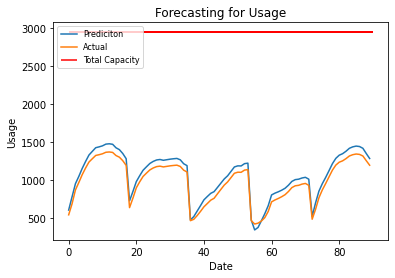

MAE: 83.47061631944445
MSE: 7321.027863142225


In [88]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test8.usage,label='Actual')
plt.hlines(test8.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test8.usage, scaled_pred))
print('MSE:', mean_squared_error(test8.usage, scaled_pred))

In [89]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train9['usage'].values.reshape(-1,1)) 

prediction_days = 90

x_train9 = []
y_train9 = []

for x in range(prediction_days, len(scaled_data)):
    x_train9.append(scaled_data[x-prediction_days:x, 0])
    y_train9.append(scaled_data[x, 0])


x_train9, y_train9 = np.array(x_train9), np.array(y_train9)
x_train9 = np.reshape(x_train9, (x_train9.shape[0], x_train9.shape[1], 1))

model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train9.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train9, y_train9, epochs = 25, batch_size=32, validation_split=0.1)


model_inputs = test9['usage'].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)


x_test9 = np.array(model_inputs)
x_test9 = np.reshape(x_test9, (x_test9.shape[0], x_test9.shape[1], 1))

pred = model.predict(model_inputs)
pred = scaler.inverse_transform(pred)
scalerpred = MinMaxScaler(feature_range=(min(train9['usage'].values),max(train9['usage'].values)))
scaled_pred = scalerpred.fit_transform(pred)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 90, 128)           66560     
                                                                 
 dropout_75 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_76 (LSTM)              (None, 90, 128)           131584    
                                                                 
 dropout_76 (Dropout)        (None, 90, 128)           0         
                                                                 
 lstm_77 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_77 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 1)               

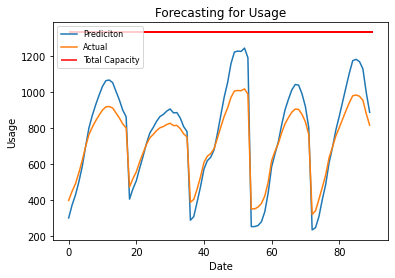

MAE: 86.72508680555555
MSE: 10603.196233791776


In [90]:
plt.plot(scaled_pred,label='Prediciton')
plt.plot(np.arange(0,90,1),test9.usage,label='Actual')
plt.hlines(test9.total_capacity,0,90,color="red",label='Total Capacity')
plt.ylabel('Usage')
plt.xlabel('Date')
plt.title("Forecasting for Usage")
plt.legend(loc='upper left', fontsize=8)
plt.show()

print('MAE:', mean_absolute_error(test9.usage, scaled_pred))
print('MSE:', mean_squared_error(test9.usage, scaled_pred))